<a href="https://colab.research.google.com/github/Bonnnana/Introduction-to-Data-Science/blob/main/Lab/Lab_2(26_11_2024_12_30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [150]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [151]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('/content/user_behavior_data.csv')

In [152]:
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [153]:
missing_values= data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
missing_values_table

,Num. of missing values,% of missing values
User ID,0,0.0
Device Model,0,0.0
Operating System,70,10.0
App Usage Time (min/day),0,0.0
Screen On Time (hours/day),0,0.0
Battery Drain (mAh/day),0,0.0
Number of Apps Installed,0,0.0
Data Usage (MB/day),140,20.0
Age,35,5.0
Gender,0,0.0


In [154]:

# Пополнување на 'Operating System' според 'Device Model'
data.loc[data['Operating System'].isnull() & data['Device Model'].str.contains('iPhone', na=False), 'Operating System'] = 'iOS'
data.loc[data['Operating System'].isnull() & ~data['Device Model'].str.contains('iPhone', na=False), 'Operating System'] = 'Android'

data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [155]:
data['Operating System'].isnull().sum()

0

Preprocess the input and the output variables appropriately.

In [156]:
classes1 = list(set(data['Gender']))
classes1

['Male', 'Female']

In [157]:
dict1 = {}
for i in range(0,len(classes1)):
    dict1[classes1[i]] = i
dict1

{'Male': 0, 'Female': 1}

In [158]:
data['Gender'] = [dict1[val] for val in data['Gender']]

In [159]:
classes2 = list(set(data['Device Model']))
classes2

['Samsung Galaxy S21',
 'iPhone 12',
 'Xiaomi Mi 11',
 'Google Pixel 5',
 'OnePlus 9']

In [160]:
dict2 = {}
for i in range(0,len(classes2)):
    dict2[classes2[i]] = i
dict2

{'Samsung Galaxy S21': 0,
 'iPhone 12': 1,
 'Xiaomi Mi 11': 2,
 'Google Pixel 5': 3,
 'OnePlus 9': 4}

In [161]:
data['Device Model'] = [dict2[val] for val in data['Device Model']]

In [162]:
classes3 = list(set(data['Operating System']))
classes3

['iOS', 'Android']

In [163]:

dict3 = {}
for i in range(0,len(classes3)):
    dict3[classes3[i]] = i
dict3

{'iOS': 0, 'Android': 1}

In [164]:
data['Operating System'] = [dict3[val] for val in data['Operating System']]

In [165]:
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,3,1,393,6.4,1872,67,1122.0,40.0,0,4
1,2,4,1,268,4.7,1331,42,944.0,47.0,1,3
2,3,2,1,154,4.0,761,32,NaN,42.0,0,2
3,4,3,1,239,4.8,1676,56,871.0,20.0,0,3
4,5,1,0,187,4.3,1367,58,988.0,31.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,1,0,92,3.9,1082,26,NaN,22.0,0,2
696,697,2,1,316,6.8,1965,68,NaN,59.0,0,4
697,698,3,1,99,3.1,942,22,457.0,50.0,1,2
698,699,0,1,62,1.7,431,13,224.0,44.0,0,1


Explore the dataset using visualizations of your choice.

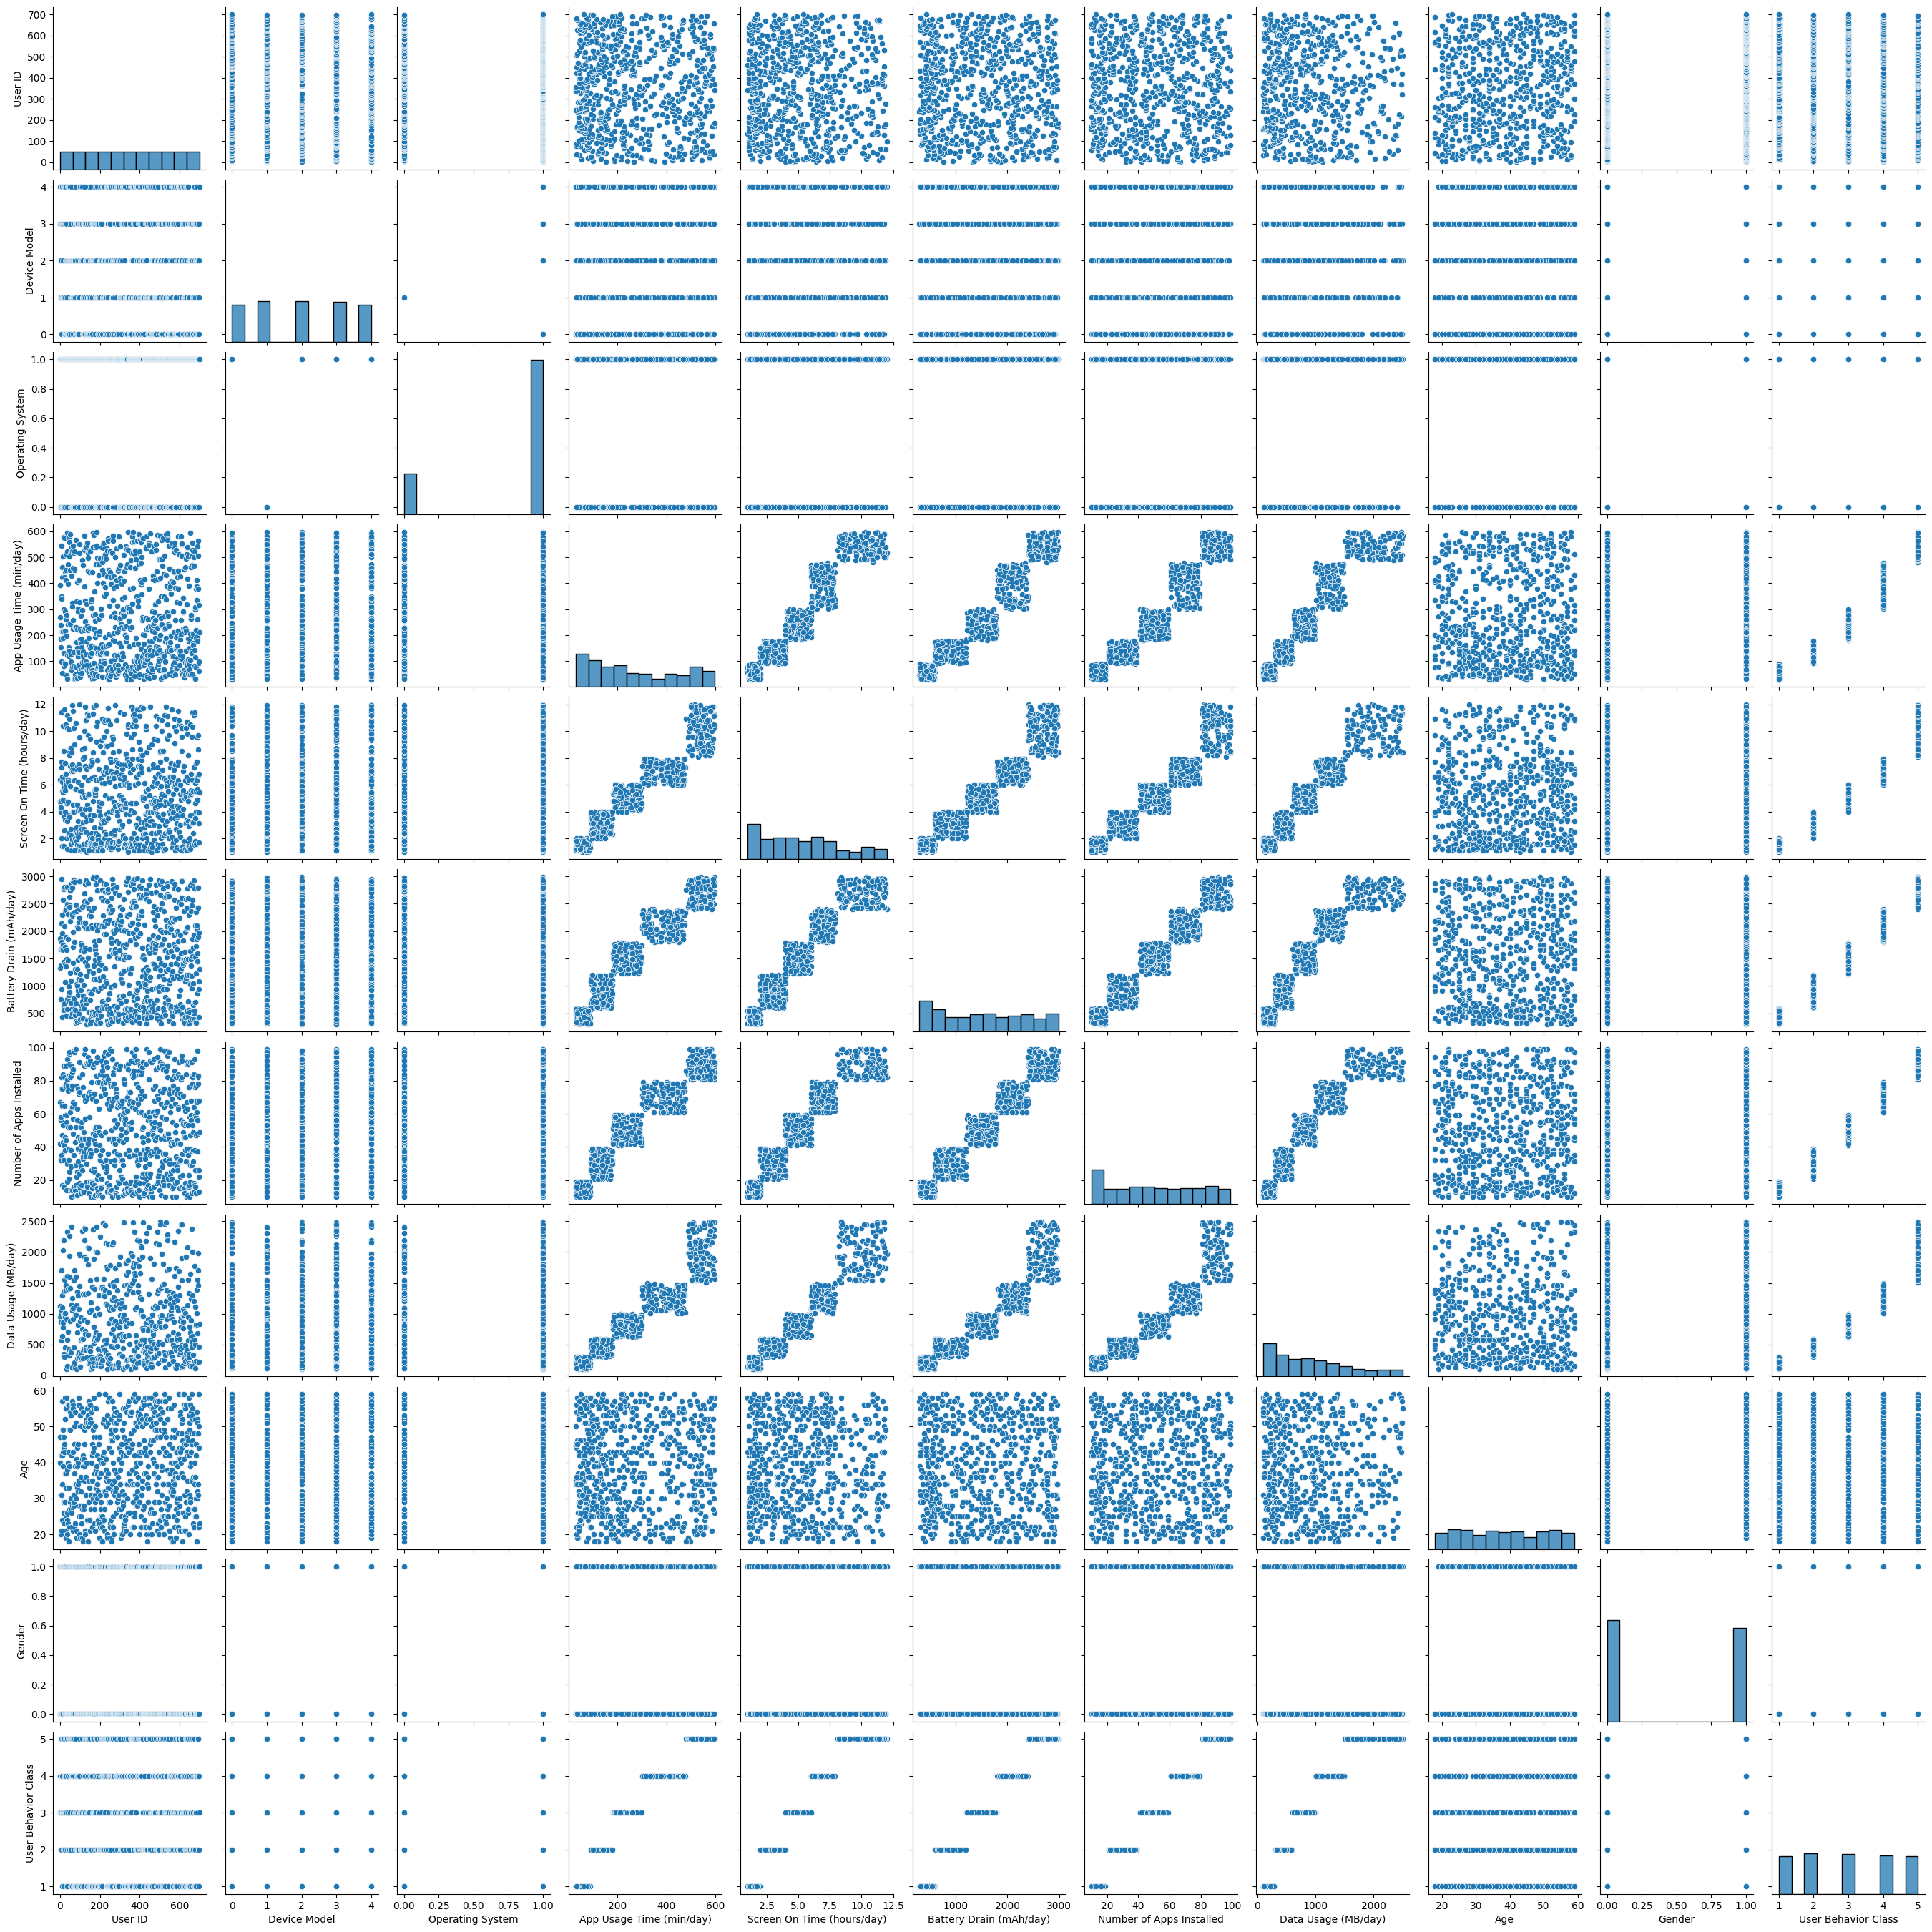

In [123]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(data)

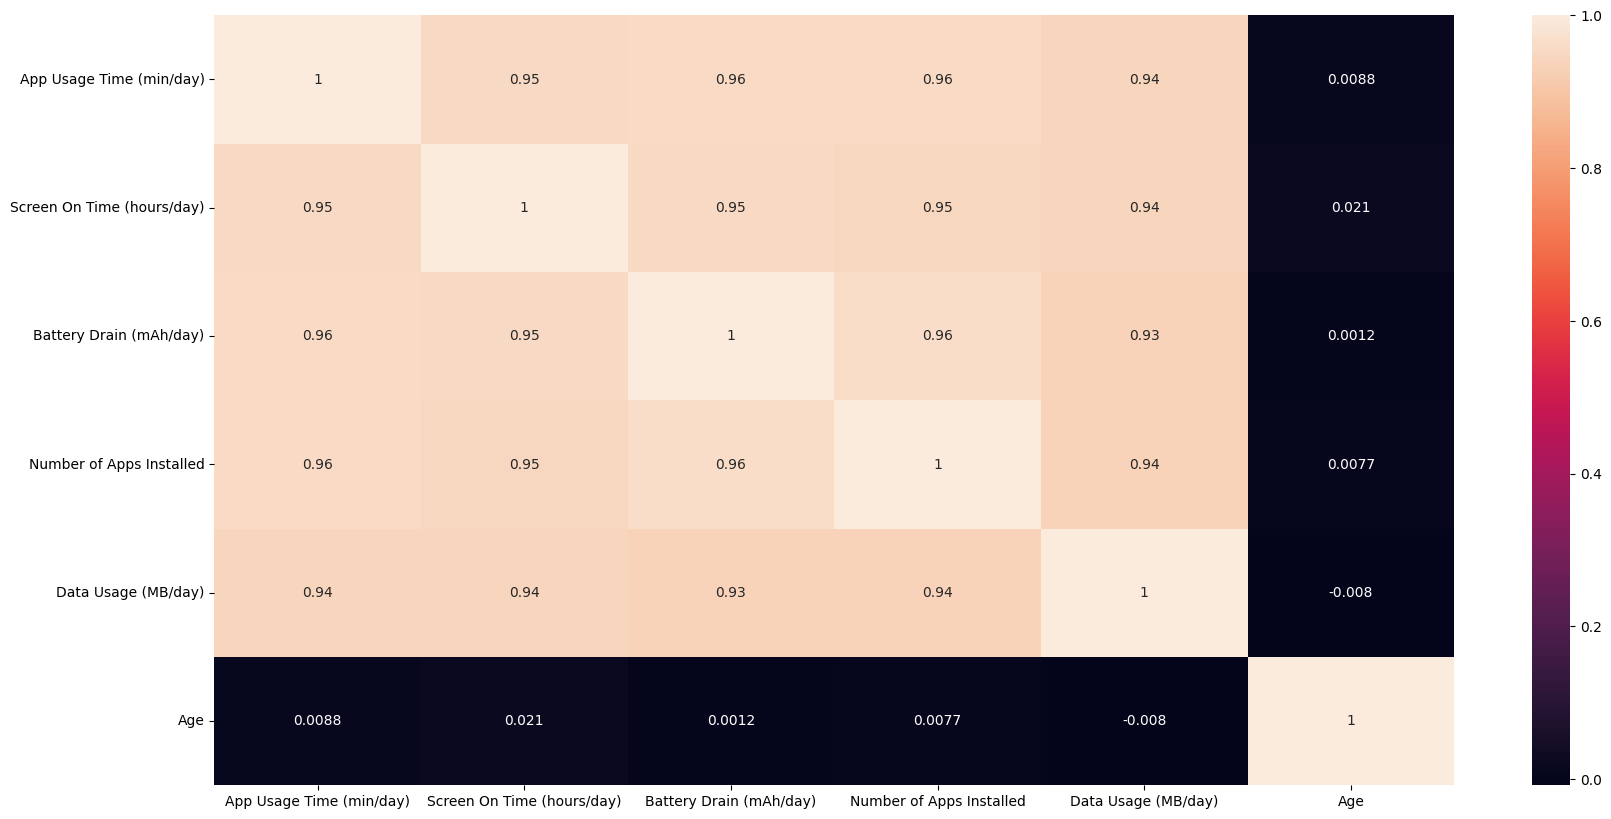

In [124]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop(columns=['Operating System','Device Model', 'Gender', 'User Behavior Class', 'User ID']).corr(), annot=True)
plt.show()

Check if the dataset is balanced.

In [166]:
# Write your code here. Add as many boxes as you need.
Y = data['User Behavior Class']
class_distribution = Y.value_counts()
print(class_distribution)
class_percentage = (Y.value_counts() / len(data)) * 100
print(class_percentage)

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64
User Behavior Class
2    20.857143
3    20.428571
4    19.857143
5    19.428571
1    19.428571
Name: count, dtype: float64


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [92]:
# Write your code here. Add as many boxes as you need.

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

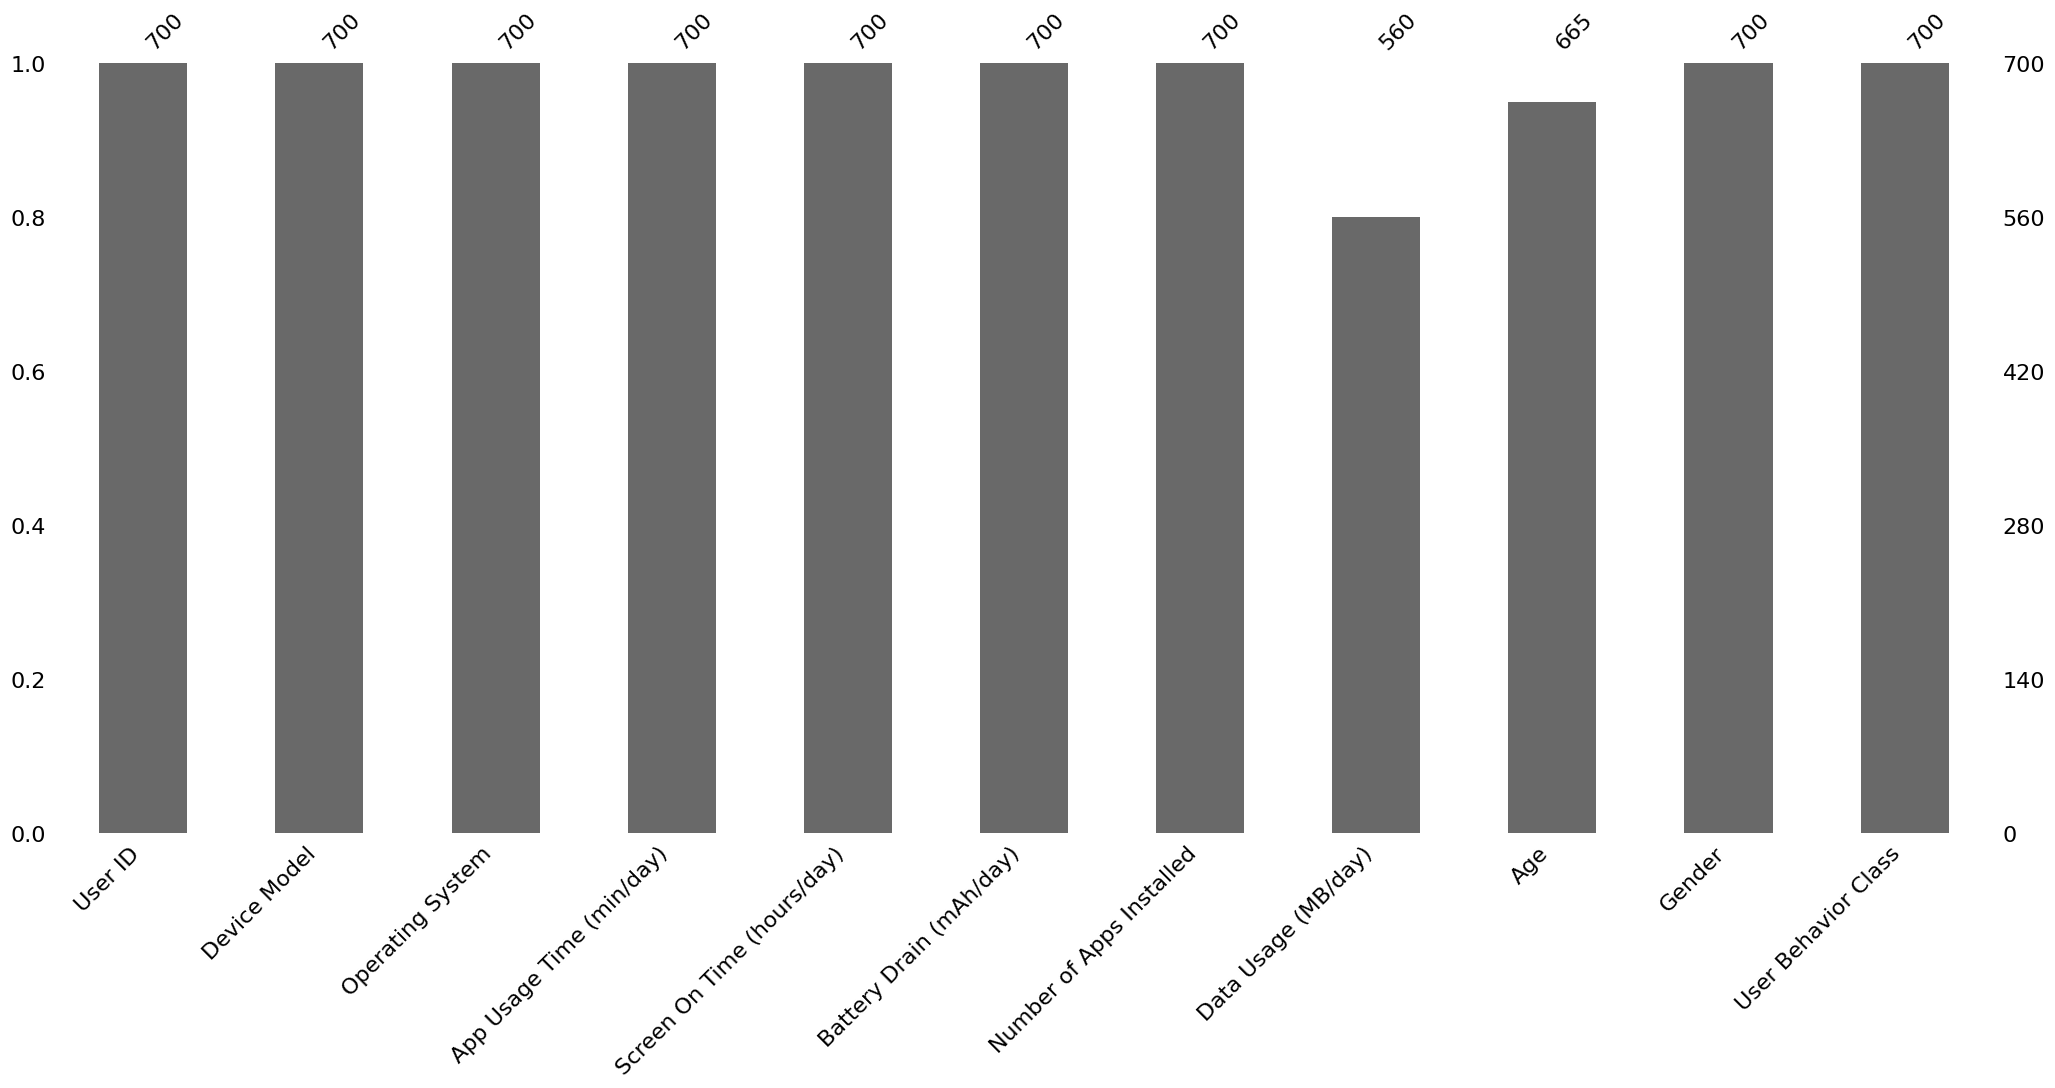

In [126]:
# Write your code here. Add as many boxes as you need.
msno.bar(data)

<Axes: >

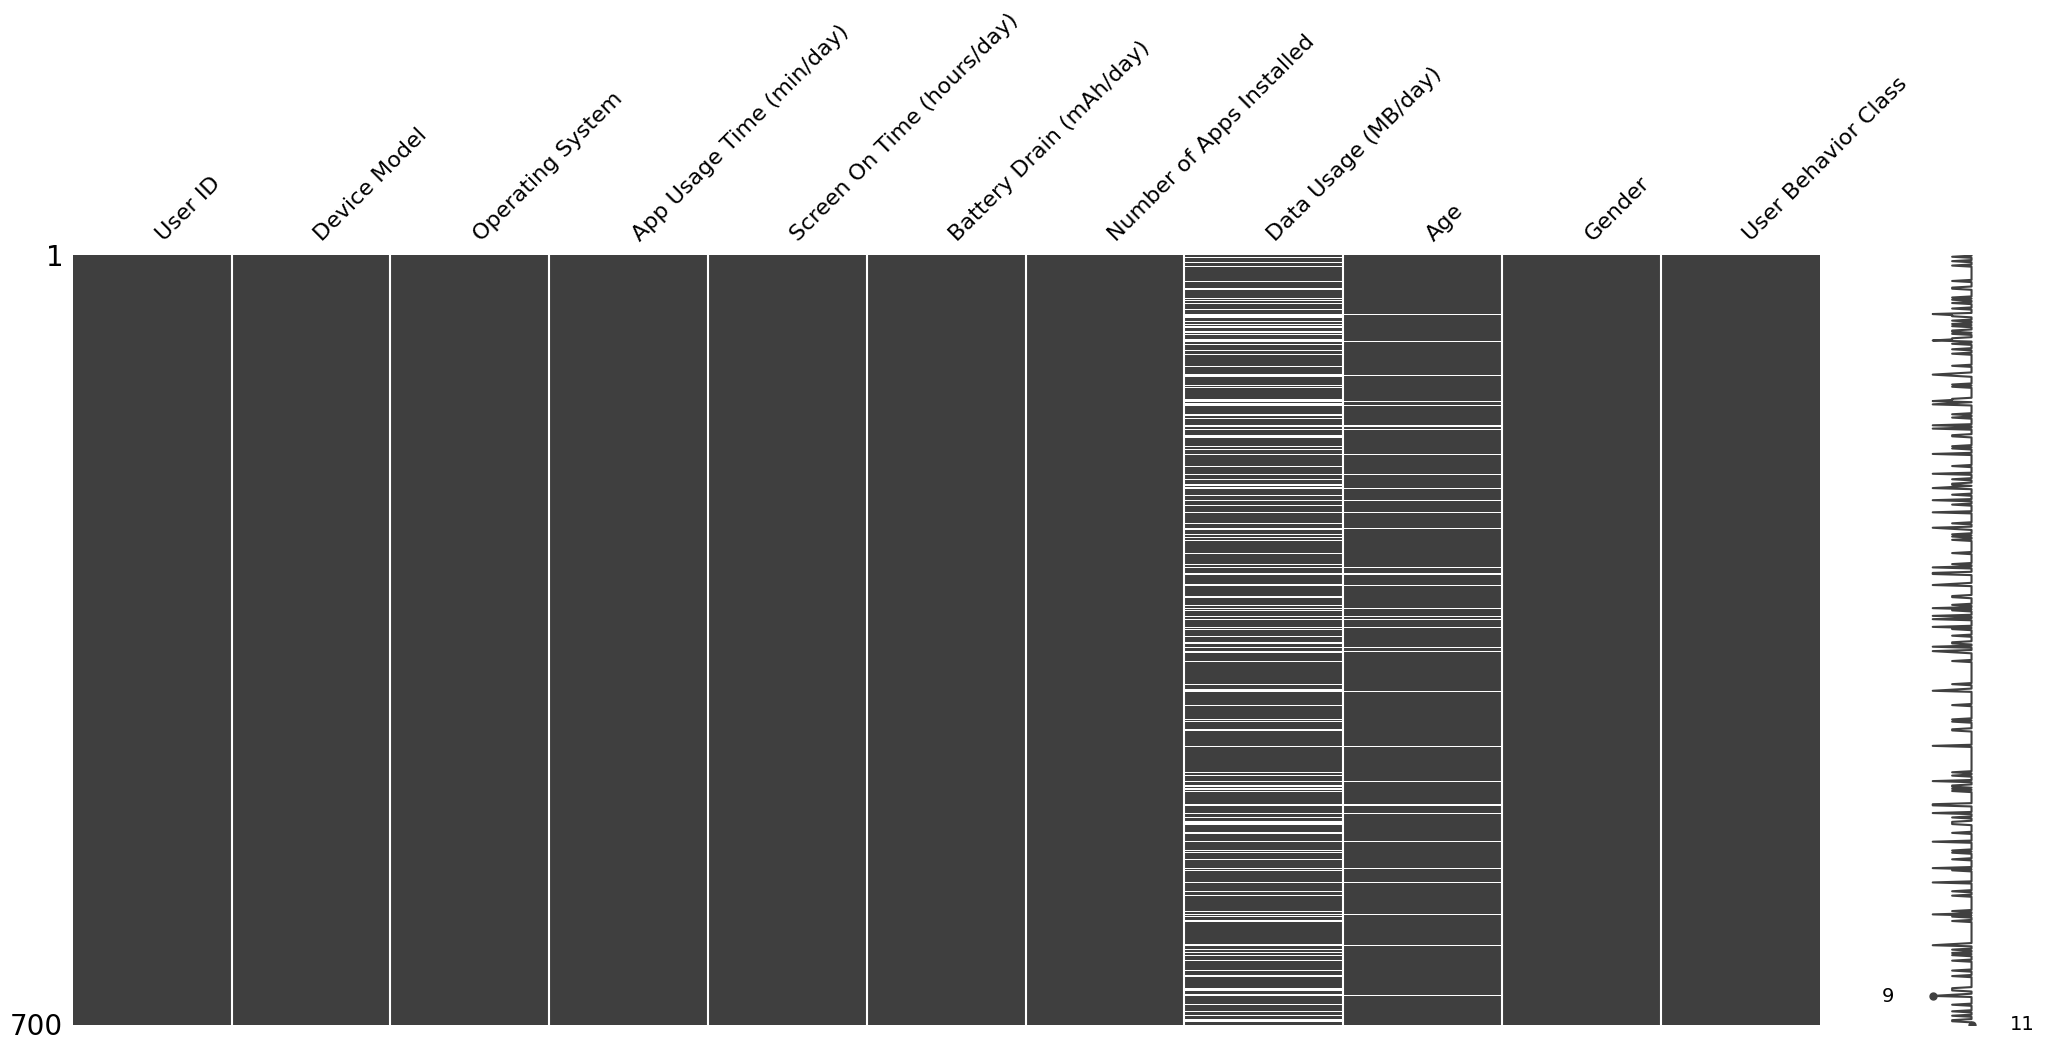

In [127]:
msno.matrix(data)

<Axes: >

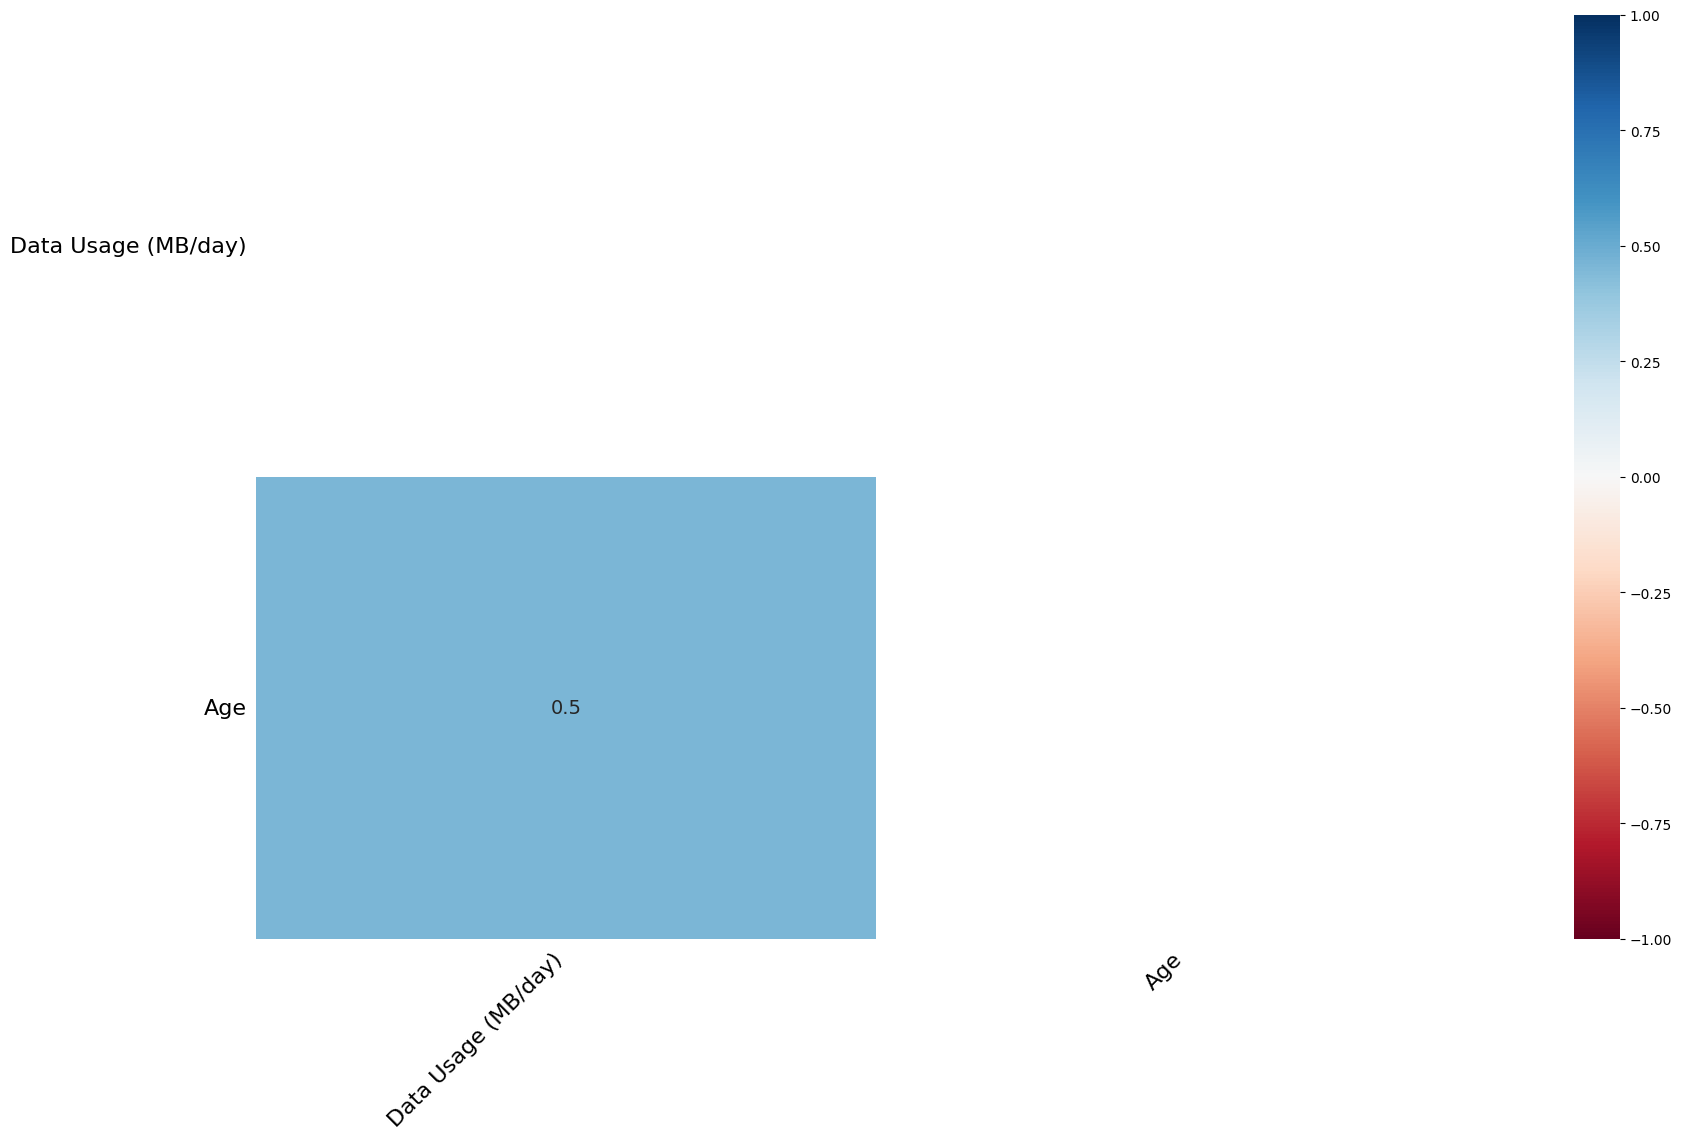

In [128]:
msno.heatmap(data)

<Axes: >

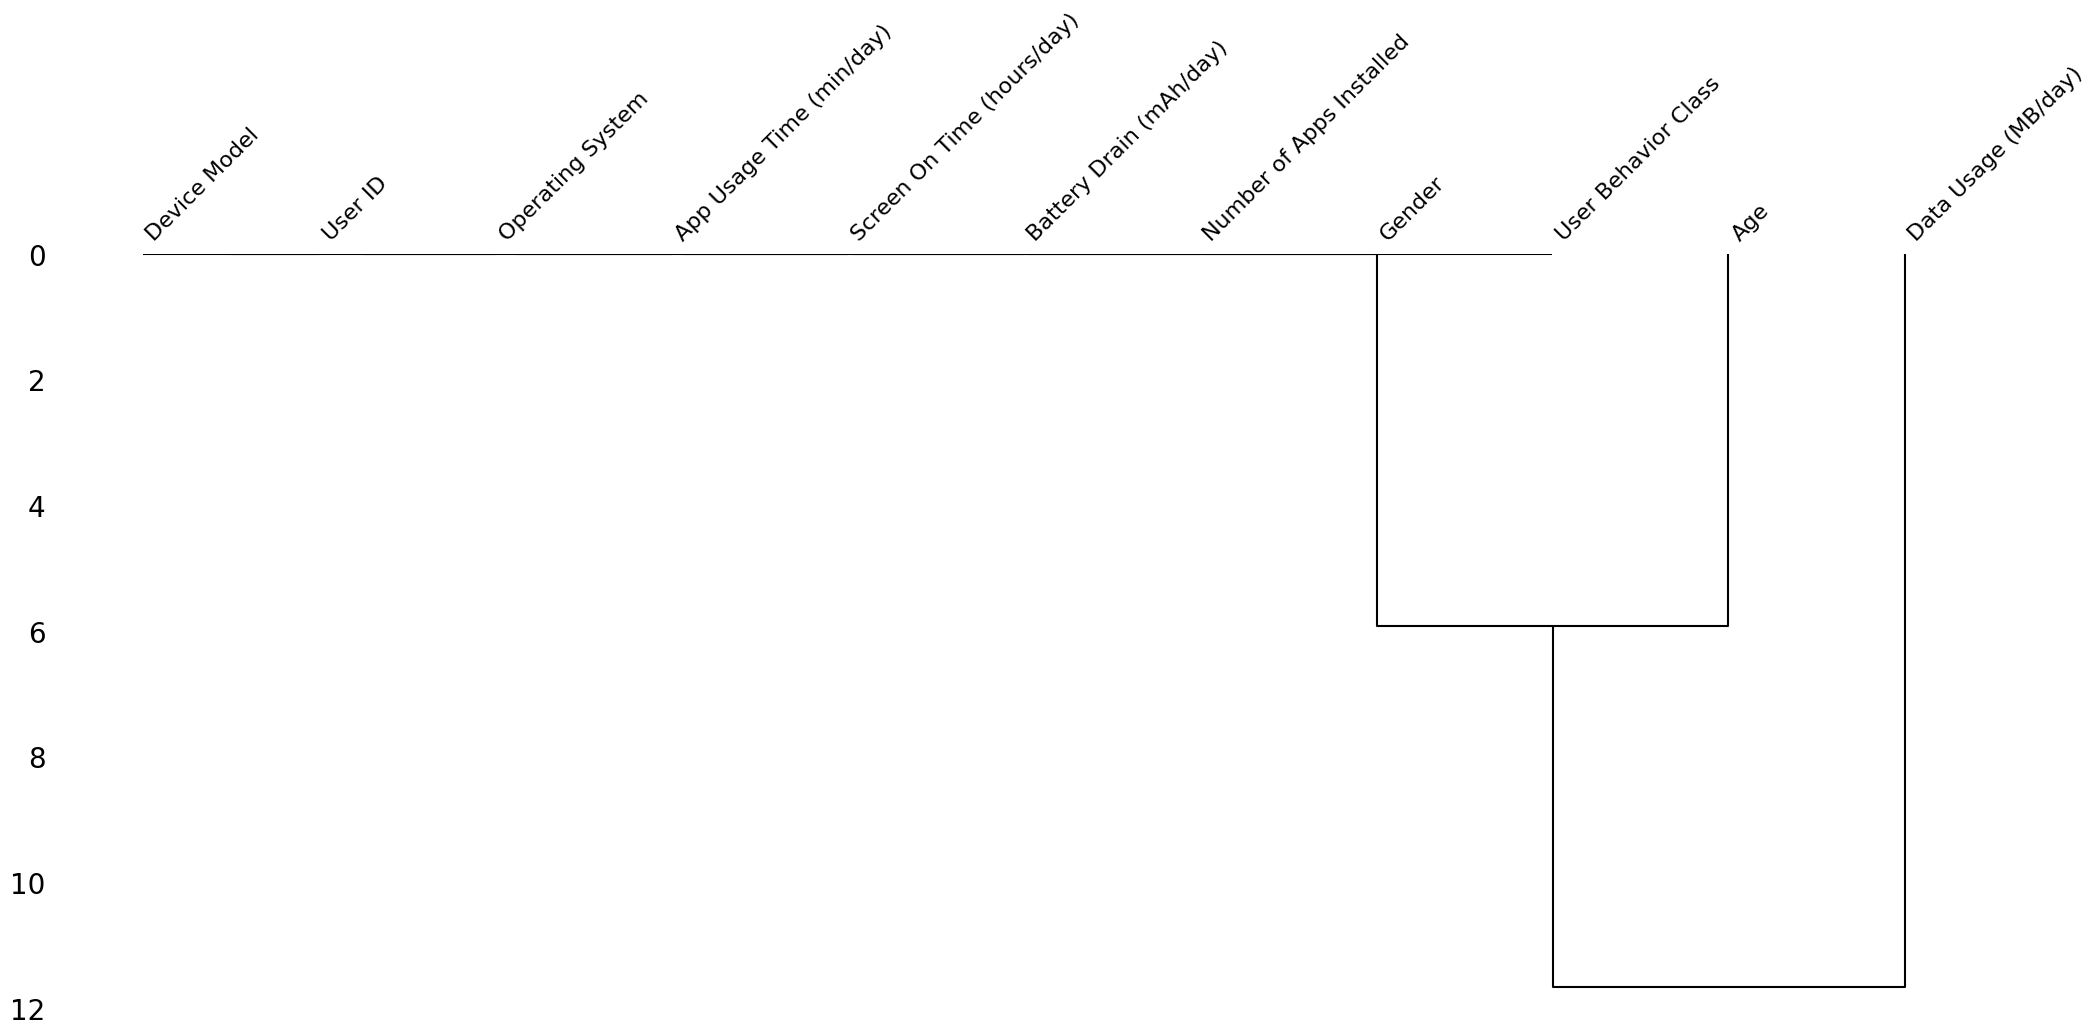

In [96]:
 msno.dendrogram(data)

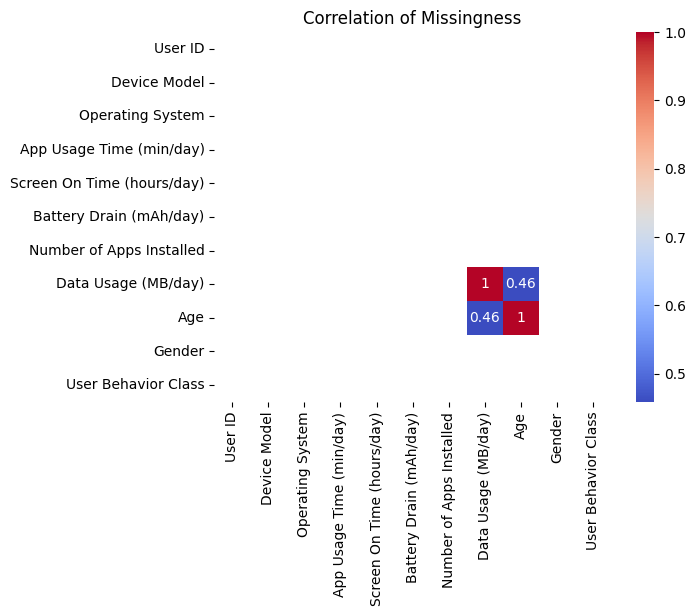

In [129]:
missing_corr = data.isnull().corr()
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Missingness")
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [167]:
# Write your code here. Add as many boxes as you need.
knn_imputer = KNNImputer(n_neighbors=3)
data[['Data Usage (MB/day)', 'Age']]= knn_imputer.fit_transform(data[['Data Usage (MB/day)', 'Age']])

In [168]:
data.isnull().sum()


,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [169]:
data2=data
data2

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,3,1,393,6.4,1872,67,1122.000000,40.0,0,4
1,2,4,1,268,4.7,1331,42,944.000000,47.0,1,3
2,3,2,1,154,4.0,761,32,919.333333,42.0,0,2
3,4,3,1,239,4.8,1676,56,871.000000,20.0,0,3
4,5,1,0,187,4.3,1367,58,988.000000,31.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,1,0,92,3.9,1082,26,959.000000,22.0,0,2
696,697,2,1,316,6.8,1965,68,2049.666667,59.0,0,4
697,698,3,1,99,3.1,942,22,457.000000,50.0,1,2
698,699,0,1,62,1.7,431,13,224.000000,44.0,0,1


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [170]:
# Write your code here. Add as many boxes as you need.

X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[1:-1]],  data['User Behavior Class'], test_size=0.2)

In [171]:
X_train.shape

(560, 9)

In [172]:
Y_train.shape

(560,)

## Feature Scaling
Standardize the features appropriately.

In [173]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,3,1,393,6.4,1872,67,1122.000000,40.0,0,4
1,2,4,1,268,4.7,1331,42,944.000000,47.0,1,3
2,3,2,1,154,4.0,761,32,919.333333,42.0,0,2
3,4,3,1,239,4.8,1676,56,871.000000,20.0,0,3
4,5,1,0,187,4.3,1367,58,988.000000,31.0,1,3


In [174]:
scaler = StandardScaler()
numeric_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [175]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,3,1,0.688256,0.367626,0.423726,0.606096,0.280034,0.141341,0,4
1,2,4,1,-0.017668,-0.186771,-0.237198,-0.322441,-0.016547,0.738384,1,3
2,3,2,1,-0.661471,-0.415053,-0.933550,-0.693856,-0.057646,0.311925,0,2
3,4,3,1,-0.181443,-0.154160,0.184279,0.197540,-0.138178,-1.564497,0,3
4,5,1,0,-0.475107,-0.317218,-0.193218,0.271823,0.056765,-0.626286,1,3


## Model Selection

Choose and train an approriate model for the given task.

In [176]:
# Write your code here. Add as many boxes as you need.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [177]:
# Write your code here. Add as many boxes as you need.
y_pred = classifier.predict(X_test)
y_pred

array([1, 4, 3, 3, 1, 4, 1, 4, 2, 3, 2, 2, 1, 5, 1, 3, 2, 1, 1, 4, 4, 5,
       2, 1, 1, 1, 4, 4, 1, 4, 5, 5, 5, 2, 1, 4, 4, 2, 2, 2, 1, 4, 4, 4,
       1, 1, 3, 5, 5, 1, 5, 4, 1, 2, 1, 2, 3, 5, 1, 3, 5, 5, 3, 3, 2, 3,
       5, 1, 5, 5, 1, 2, 5, 4, 1, 4, 5, 2, 4, 2, 1, 3, 5, 2, 4, 2, 1, 2,
       3, 2, 4, 5, 1, 1, 2, 3, 5, 2, 3, 3, 1, 2, 2, 4, 1, 3, 2, 2, 5, 3,
       2, 2, 3, 3, 1, 5, 3, 2, 3, 2, 1, 1, 2, 5, 4, 3, 3, 4, 5, 1, 4, 3,
       4, 1, 2, 5, 1, 2, 4, 5])

Assess the performance of the model by using different classification metrics.

In [179]:
# Write your code here. Add as many boxes as you need.
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.99        35
           2       0.97      1.00      0.98        31
           3       0.96      1.00      0.98        23
           4       1.00      0.96      0.98        26
           5       1.00      1.00      1.00        25

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [180]:
# Write your code here. Add as many boxes as you need.
input2 = data2.iloc[:, 1:-1]
output2= data2['User Behavior Class']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(input2,  output2, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [181]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
numeric_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [182]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)


model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X2_train, Y2_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score: 1.0


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [184]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X2_test)

print("Test Set Accuracy:", accuracy_score(Y2_test, y_pred))
print("Classification Report:\n", classification_report(Y2_test, y_pred))

Test Set Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

